In [1]:
from IPython.display import Image

# 1. 이 책에서 모델 구현할 때의 규칙  

### 0. 수학과 딥러닝 등 많은 분야에서 열벡터 방식을 선호하지만 이 책에선 구현 편의를 고려해 행벡터로 다룬다.   
파이썬으로 구현할 때 벡터를 행벡터로 취급할 경우,   
벡터를 가로방향 행렬로 변환해 사용하면 명확해진다.   
예컨대 원소 수가 N개인 벡터면 1 X N 형상의 행렬로 처리한다

 
### 1. 모든 계층은 forward()  와 backward() 메서드를 가진다   
### 2. 모든 계층은 인스턴스 변수인 params와 grads를 가진다

### params : 가중치와 편향 같은 매개변수를 담는 리스트   
### grads : params에 저장된 각 매개변수에 대응하여, 해당 매개변수의 기울기를 보관하는 리스트

## 3. softmax 함수와 CEE 를 계산하는 계층을 하나로 구현한다

### 두 계층을 통합하면 역전파 계산이 쉬워진다.

## 4. Repeat 노드 

길이가 D인 배열을 N개로 복제하는 노드 

사례   
   
   
편향을 노드마다 더해줄 때 사용

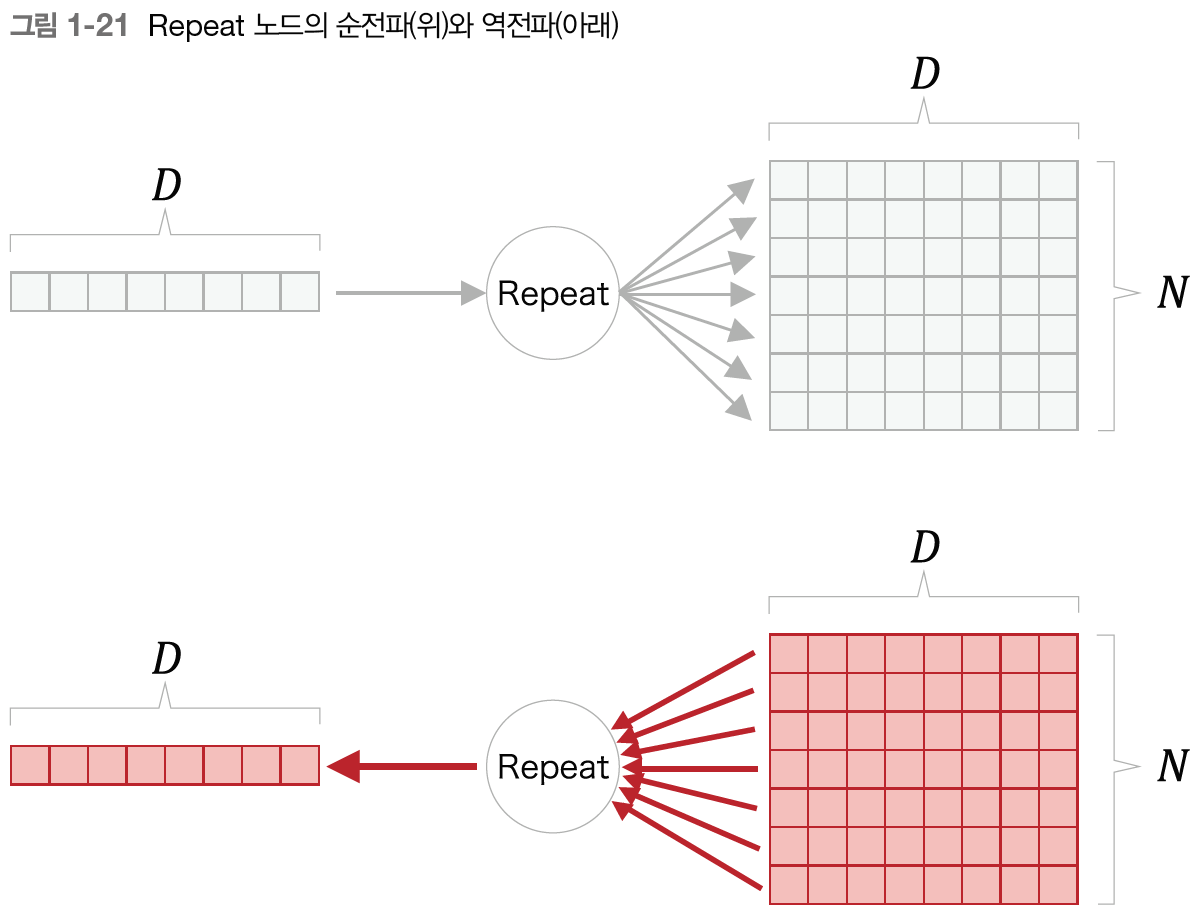

In [3]:
Image("1.png")

신경망 그림으로 치면 아래와 같다

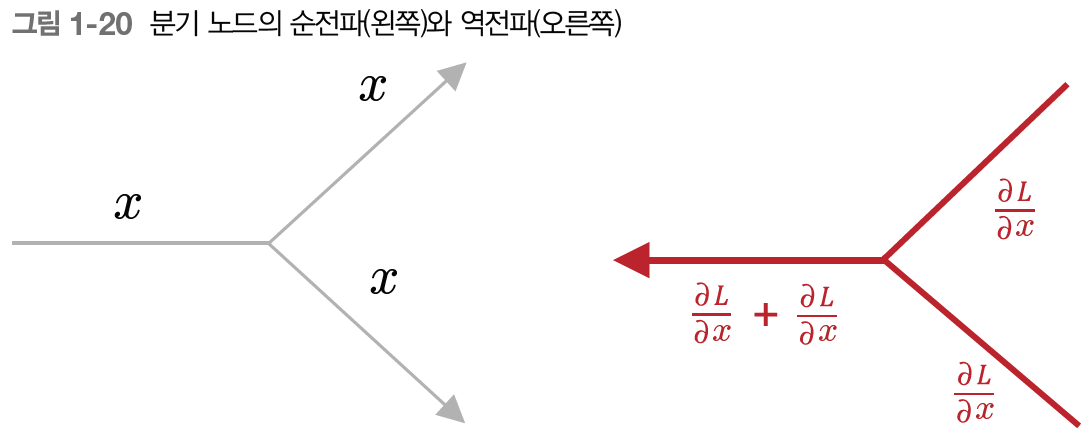

In [4]:
Image("0.png")

In [8]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)       # 입력   8차원 벡터 
y = np.repeat(x, N, axis = 0)   # 순전파 
                                # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
                                # 열방향으로 7만큼 x를 복제
print("x : ", x)
print("y : ", y)

x :  [[ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]]
y :  [[ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]
 [ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]
 [ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]
 [ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]
 [ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]
 [ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]
 [ 1.03907376 -2.06617715 -0.61772278 -2.49168894  0.35313635 -1.58962469
  -0.62102105  1.0036251 ]]


In [9]:
dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims = True)  # 역전파, dy 를 열방향으로 다 더해 (1,8)형상의 벡터로 만든다
dx                                          # keepdims = True : 2차원 배열의 차원수를 유지한다. (1, D) 유지
                                            # False면 그냥 (D) 가 된다.

array([[ 3.8013596 , -3.68031322,  6.10265631,  0.96698824,  1.99434623,
        -1.85116861, -0.6344576 , -1.80426709]])

# 5. sum 노드

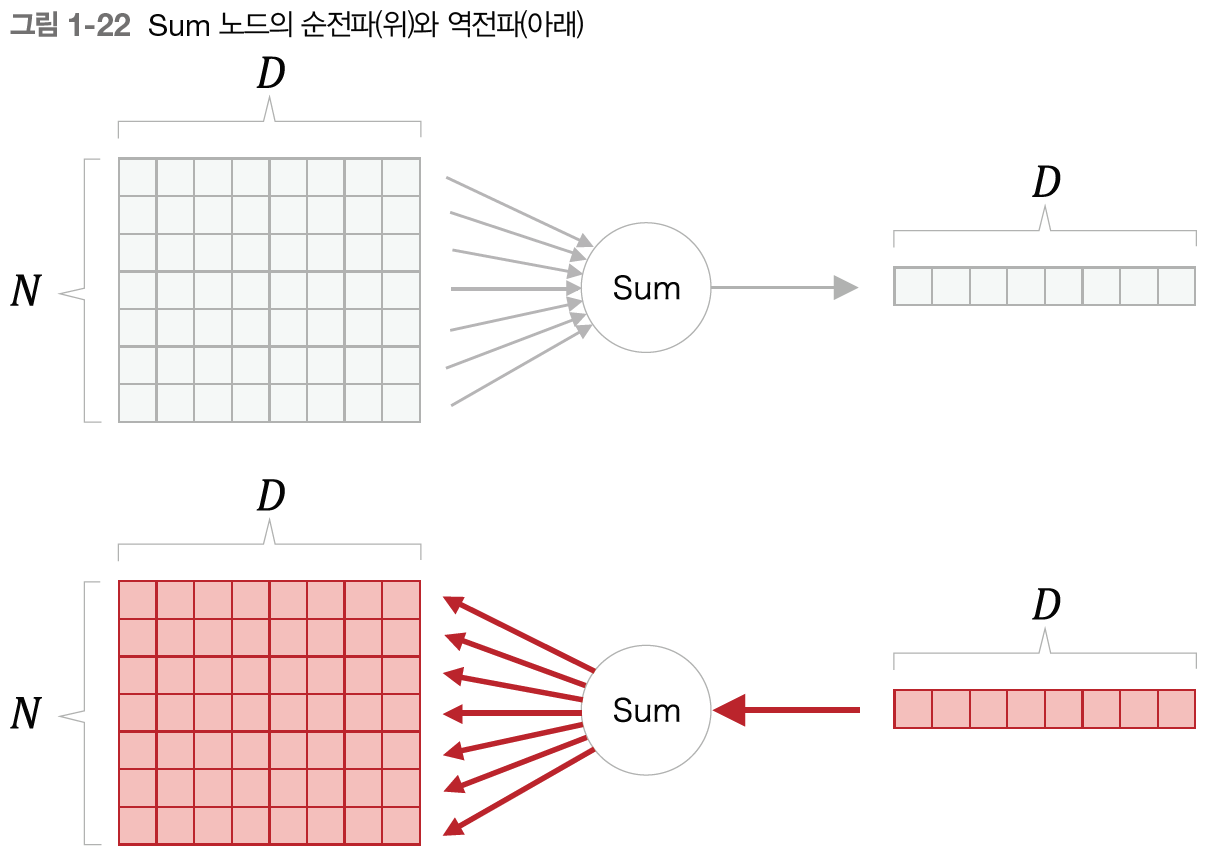

In [10]:
Image("3.png")

In [12]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)             # 7 x 8 행렬 : 배치사이즈 7, 각 입력 데이터의 차원은 8
y = np.sum(x, axis = 0, keepdims=True) # 열방향으로 더한 값
y

array([[-4.25031418,  3.48195332,  2.59085463, -1.97049335, -2.44304877,
         2.08119378, -2.62535593, -2.43008365]])

In [14]:
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)   # 역전파,  upstream gradient dy를 열방향으로 N만큼 복제.
dx

array([[ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036],
       [ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036],
       [ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036],
       [ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036],
       [ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036],
       [ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036],
       [ 1.82982866,  0.03238896, -0.21461892,  1.12527275,  0.53864531,
         0.16779005, -1.41860155, -1.30123036]])

# 6. Matmul 노드

In [ ]:
class MatMul:
    def __init__(self, W):
        self.params = [W]                # 순전파와 역전파 때 쓰기 위해 입력으로 받은 가중치 따로 저장
        self.grads = [np.zeros_like(W)]  # 기울기 보관할 리스트 
        self.x = None      # 순전파 때 받은 입력값을 저장하고, 역전파 때 다시 쓰기 위해 인스턴스 속성으로 만들어 둚

    def forward(self, x):
        W, = self.params    
        out = np.dot(x, W)
        self.x = x          # 역전파때 쓰기 위해 입력값 따로 저장 
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)        # 왜 이렇게 되는지 밑시딥2 책 52, 54쪽 / 미시건 강의  6강참고
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW       # [...] 생략기호 ellipsis : 넘파이 배열의 덮어쓰기 수행
                                   # self.grads[0] = dW       이렇게 '할당'하면 얕은 복사  
                                                             # (실제 데이터가 복사되는 게 않으므로 얕은 복사, self.grads[0] 가 가리키는 주소가 dW로 바뀔뿐)
                                   # self.grads[0][...] = dW  이렇게 덮어쓰면 깊은 복사     
                                                             # self.grads[0]의 메모리 위치는 변하지 않고, 그 주소에 dW의 원소가 복사된다.
                                   # [ : , : , : , 0]  == [ ... , 0 ]  이게 ...에 해당하는 차원은 그대로 고정해준다고 해석해도 되니까
                                   # [...] 이게 깊은 복사가 되는 걸 메모리 주소를 고정시킨다고 해석하면 생략기호를 깊은 복사에 쓰는 게
                                   # 말이 되는 것 같다
        return dx  

### grads와 grads[0]의 차이

In [73]:
dW = np.random.randn(4,5)
z = np.zeros_like(dW)
grads = [z]             # grads는 리스트 객체를 가리키는 변수다. 

In [74]:
grads = dW             # 그 grads가 dW를 가리키게 하면 
grads                  # grads는 더 이상 리스트 객체가 아니라 넘파이 배열을 가리키게 된다. 

array([[ 0.61577402, -0.01319616,  0.31826251,  0.64344687,  0.2511007 ],
       [ 0.88231249,  1.59536703, -0.70440735, -0.21086038,  0.33891614],
       [ 0.43446294,  0.82378623, -0.16435176, -0.45955478,  0.31008578],
       [-0.03130824, -1.43685087,  0.97991154, -0.72741755, -0.1775282 ]])

In [75]:
dW = np.random.randn(4,5)
z = np.zeros_like(dW)
grads = [z]               # grads는 리스트 객체를 가리키는 변수다. 

In [76]:
grads[0] = dW             # 그 grads 리스트 안에 있는 첫번째 원소가 dW를 가리키게 하면 
grads                     # grads는 리스트 객체를 여전히 가리키게 되고 그 안에 있는 원소만 영행렬에서 dW로 바뀌게 된다. 

[array([[-0.72475446,  1.25469973,  0.01352804,  0.69389058,  1.2124301 ],
        [-0.19495731, -0.28532802, -0.8791723 ,  0.64332958,  0.34837646],
        [ 0.19571549,  1.35665922,  0.84512137,  0.80748821,  0.29426444],
        [ 0.68906634,  1.81464182, -2.05587832,  0.85972476, -1.05580044]])]

### [...] 예제

In [37]:
a = np.array([1, 2, 3])  # a 와 b가 서로 다른 메모리 주소를 가리킨다. 
b = np.array([4, 5, 6])

a = b         # a가 b의 메모리 주소를 가리키게 된다. 
print(id(a))
print(id(b))

2698830301424
2698830301424


In [39]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])


a[...] = b   # a 메모리 주소에 b 값을 복사해온다. 즉 덮어쓰기 = 기존 a의 메모리 주소 위치가 바뀌지 않는다 
print(id(c))
print(id(d))

[4 5 6]
[4 5 6]
2698830324320
2698830343264


# 2. 구현 연습

### sigmoid

In [2]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []  # 시그모이드 계층에는 학습하는 매개변수, 저장할 기울기가 따로 없으므로 빈리스트로 초기화.
                                          # 그냥 규칙 때문에 만든 것 
            
        self.out = None           # 시그모이드 출력값을 역전파 때 사용해야 하므로 인스턴스 속성으로 만들어 둚

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out               # 시그모이드 층 출력값 저장
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out   # 시그모이드층의 local gradient 계산식 : 밑시딥1 5. 오차역전파법 참고
        return dx

### affine

In [3]:
class Affine:
    def __init__(self, W, b):  # 어파인 계층은 초기화될 때 가중치와 편향을 받는다. 이 두 매개변수는 학습될 때 수시로 갱신된다.
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None                                          # 순전파 때 받은 입력값을 저장하고, 역전파 때 다시 쓰기 위해 인스턴스 속성으로 만들어 둚

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x                                 # 역전파때 쓰기 위해 입력값 따로 저장 
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)      # 편향이 더해지는 건 repeat 노드와 같으므로, 역전파 시엔 sum
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
    

### softmax with loss

softmax 계층의 역전파는   
   
(softmax 계층의 출력 - 정답 레이블) 로 말끔하게 떨어진다.

In [11]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):             # 소프트맥스 로스계층은 입력값으로 마지막 은닉층의 출력값 x와 정답레이블 t를 받는다. 
        self.t = t                  
        self.y = softmax(x)             # x는 소프트맥스 함수 통과시켜 정규화된 출력 y를 내고 
        
        if self.t.size == self.y.size:       # 정답 레이블이 원핫 벡터일 경우 [0, 0, 1]
            self.t = self.t.argmax(axis=1)   # 정답의 인덱스로 변환              2
                                             # np.argmax()  배열의 원소 중 최대값의 인덱스를 반환한다.
                                             # 그러면 정답레이블이 왜 원핫인코딩으로 돼있지? 정답레이블의 위치만 표현해서
                                             # 정답레이블의 위치(인덱스)만 알아내서 그에 상응하는 모델의 예측값에 음의 로그우도를 
                                             # 구하려고.

        loss = cross_entropy_error(self.y, self.t)   # 모델의 출력값 y와 정답클래스의 레이블 값 t 의 교차 엔트로피 오차를 구한다.
        return loss                                 # 단일 스칼라 값 나옴  ex) 0.09455146950527489
    
#     def cross_entropy_error(y, t):   # 위 forward() 에서 이미 self.t = self.t.argmax(axis=1) 이걸 해줬기 때문에
#         if y.ndim == 1:              #  if 문 두개를 건너 뛰고 바로  batch_size = y.shape[0] 여기로 간다. 
#             t = t.reshape(1, t.size)
#             y = y.reshape(1, y.size)

#         # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환. 왜? 아래 return을 봐라 
#         if t.size == y.size:
#             t = t.argmax(axis=1)

#         batch_size = y.shape[0]  (여기서 배치사이즈는 클래스 수)

#         return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size  

                             # 0부터 (배치사이즈-1)까지의 넘파이 배열을 만들어서, 한 배치 안의 각각의 행(데이터)에 대해
                             # 정답레이블 위치에 해당하는 모델의 출력값에 로그를 씌워 모두 더한 후 마이너스를 붙이고
                             # 다시 배치사이즈로 나눠, 데이터당 평균 CEE를 구한다.
                             # 이때 정답 레이블의 위치를 알기 위해 위에서 t = t.argmax(axis=1) 이걸 한 것. 

    def backward(self, dout=1):                  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        batch_size = self.t.shape[0]              # 30

        dx = self.y.copy()  # 소프트 맥스 출력     self.y.shape : (30,3)
        dx[np.arange(batch_size), self.t] -= 1   # np.arange(30)        
                                                 
        # 왜 정답레이블에 해당하는 소맥 출력값에 대해서만 1을 빼줄까요?
        # (결론부터 말하자면 모델의 예측값들 중에서 정답레이블에 해당하는 예측값에서만 1을 빼준 값을 역전파 시키는 것과 같다)
                                                
    # 우리가 학습을 통해 최종적으로 원하는 건 정답레이블에 해당하는 모델의 출력값(소맥 통과한값)이 100%가 되는 것 
    # 즉 모델의 출력값(소맥 통과한값)이 1이 되는거다. 
    # 어떤 클래스의 예측을  100% 확률에 가깝게 맞췄을 때 학습이 끝나게 하려면 어떻게 해야할까?
    # 신경망 학습의 목적을 softmax 계층의 출력이 원핫인코딩된 정답레이블과 가까워지도록 
    # 가중치 매개변수의 값이 조정되게 하면 되지 않을까? 어떻게 하면 그렇게 되게 할 수 있을까? 
    
    # 우리가 하려는 건 모델의 예측값을 확률로 해석할 수 있게 해서
    # 맞추려는 클래스의 확률을 100% 즉 1이 되게 하는 것이다.
    # 모델의 예측값을 구하는 과정은 입력값에 가중치를 곱해 
    # 활성화 함수를 통과 시키는 레이어들 쌓는 것인데
    # 최종적으로 소프트 맥스를 통과시켜 확률로 해석할 수 있게 만들어준다.
    # 정답레이블을 원핫인코딩 해줘서
    # 정답레이블에 해당하는 모델의 예측값의 확률에만 음의 로그우도를 씌우면(이 값을 loss라 하자)
    # 경사하강법을 써서
    # (loss)를 0으로 자동적으로 수렴하게 만들 수 있다.
    # 경사하강법은
    # 가중치에 대한 loss의 미분값(기울기)을
    # 가중치에서 빼줘서 그걸 새로운 가중치로 만드는 것이다.
    # 이걸 반복하면
    # loss가 점점 0으로 수렴해
    # 더이상 가중치를 갱신할 필요가 없어지는 지점에 이르게 된다.
    # 가중치에 대한 loss의 미분값을 구하자면
    # 계산그래프 상에서
    # 체인룰과 편미분을 써서
    # 중간중간 local gradient를 구해줘야 하는데
    # 그 local gradient 들중 하나가
    # 모델의 예측값에 대한 loss의 미분값이다.
    # 이 값은
    # 수식을 정리하면
    # 모델의 예측값에서 정답레이블을 빼준 것과 같아진다.
    # 그런데 정답 레이블은 원핫인코딩되어 있으므로
    # 결과적으로 정답레이블에 해당하는 모델의 예측값에서 1을 빼준 값만 역전파 하게 된다.
    # 그 값(오차)이 크면
    # 앞의 계층에서 업데이트 되는 양이 커지고
    # 오차가 작으면 업데이트 되는 양이 작아진다.

                    
        dx *= dout                            # 어차피 1을 곱하는 건데 이 코드는 왜 있는 거지?
                                              # 우리가 구한 dx는 local gradient, dout은 upstream gradient
                                              # 둘을 곱한게 downstream gradient
        dx = dx / batch_size
        # 왜 dx를 배치사이즈로 나눠줘도 될까요?

        return dx       # len(dx) = 30,  dx.shape = (30, 3)

In [73]:
t = np.array([0, 0, 0, 1, 0, 0])
t = t.argmax(axis=0)  # np.argmax()  배열의 원소 중 최대값의 인덱스를 반환한다. 
t

3

In [74]:
t = np.random.randn(4,5)
u = t.argmax(axis=1)
print(t)
print(u)

[[-1.38796923 -1.88753734  1.51209279 -1.0476029  -0.30850462]
 [ 1.66724972 -0.91910762 -1.07141897  0.1563788   1.41980496]
 [ 1.36020655  0.68414291  1.267091   -0.45322905 -1.1362058 ]
 [-0.48452454 -0.67157423 -0.6764295  -0.28831316  0.41252656]]
[2 0 0 4]


# 아래 코드 실행하지 말 것

# softmax with loss층의 backward 메서드를 돌렸을 때 

In [41]:
idx = np.random.permutation(data_size)    
x = x[idx]  
t = t[idx]  

batch_x = x[:batch_size]    
batch_t = t[:batch_size]  

In [42]:
batch_t

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [43]:
batch_t = batch_t.argmax(axis=1)  #  # np.argmax()  배열의 원소 중 최대값의 인덱스를 반환한다.  즉 정답 레이블의 인덱스를 반환 
batch_t

array([1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 1, 2], dtype=int64)

In [44]:
dx = model.forward(batch_x, batch_t)       # dx = softmax 출력값 

In [45]:
dx

array([[0.34060112, 0.32774807, 0.33165081],
       [0.34059476, 0.32774255, 0.33166269],
       [0.34058106, 0.32776098, 0.33165796],
       [0.34059018, 0.32771194, 0.33169788],
       [0.34060921, 0.32776325, 0.33162754],
       [0.34059573, 0.32775594, 0.33164833],
       [0.34058343, 0.32778662, 0.33162995],
       [0.34059796, 0.327756  , 0.33164605],
       [0.34058848, 0.32773914, 0.33167238],
       [0.34059646, 0.32771353, 0.33169001],
       [0.34058437, 0.32774524, 0.33167039],
       [0.34059443, 0.32771557, 0.33169   ],
       [0.34058159, 0.3277735 , 0.33164491],
       [0.34059014, 0.32775228, 0.33165759],
       [0.34060189, 0.32772528, 0.33167283],
       [0.34057852, 0.32772579, 0.3316957 ],
       [0.34059258, 0.32773784, 0.33166958],
       [0.34059362, 0.32775006, 0.33165632],
       [0.34059531, 0.32775614, 0.33164855],
       [0.34058683, 0.32778817, 0.331625  ],
       [0.34059705, 0.32771863, 0.33168432],
       [0.34059236, 0.32773653, 0.33167111],
       [0.

In [47]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [48]:
dx[np.arange(30)]  

array([[0.34060112, 0.32774807, 0.33165081],
       [0.34059476, 0.32774255, 0.33166269],
       [0.34058106, 0.32776098, 0.33165796],
       [0.34059018, 0.32771194, 0.33169788],
       [0.34060921, 0.32776325, 0.33162754],
       [0.34059573, 0.32775594, 0.33164833],
       [0.34058343, 0.32778662, 0.33162995],
       [0.34059796, 0.327756  , 0.33164605],
       [0.34058848, 0.32773914, 0.33167238],
       [0.34059646, 0.32771353, 0.33169001],
       [0.34058437, 0.32774524, 0.33167039],
       [0.34059443, 0.32771557, 0.33169   ],
       [0.34058159, 0.3277735 , 0.33164491],
       [0.34059014, 0.32775228, 0.33165759],
       [0.34060189, 0.32772528, 0.33167283],
       [0.34057852, 0.32772579, 0.3316957 ],
       [0.34059258, 0.32773784, 0.33166958],
       [0.34059362, 0.32775006, 0.33165632],
       [0.34059531, 0.32775614, 0.33164855],
       [0.34058683, 0.32778817, 0.331625  ],
       [0.34059705, 0.32771863, 0.33168432],
       [0.34059236, 0.32773653, 0.33167111],
       [0.

In [49]:
dx[np.arange(30),batch_t]    # dx에서 각 원소(3차원 배열)에 대해 정답레이블에 해당하는 원소만 인덱싱 

array([0.32774807, 0.34059476, 0.34058106, 0.32771194, 0.33162754,
       0.32775594, 0.34058343, 0.327756  , 0.34058848, 0.32771353,
       0.34058437, 0.32771557, 0.34058159, 0.33165759, 0.32772528,
       0.32772579, 0.34059258, 0.33165632, 0.32775614, 0.34058683,
       0.32771863, 0.34059236, 0.33162878, 0.33162417, 0.33162772,
       0.34058759, 0.33162614, 0.34058431, 0.32772659, 0.33165827])

In [50]:
dx[np.arange(30), batch_t] -= 1         # dx = softmax 출력값에서, 정답 레이블에 해당하는 출력값에만 1을 빼준다. 
dx                                     # 정답 레이블에 대한 w만 갱신하고 나머지 틀린 것들은 그대로 둔다?
                                       # 그럼 나머지 정답레이블이 아닌 것들에 대한 모델의 예측값(소프트맥스 출력값)은 자동적으로 낮아지나?

array([[ 0.34060112, -0.67225193,  0.33165081],
       [-0.65940524,  0.32774255,  0.33166269],
       [-0.65941894,  0.32776098,  0.33165796],
       [ 0.34059018, -0.67228806,  0.33169788],
       [ 0.34060921,  0.32776325, -0.66837246],
       [ 0.34059573, -0.67224406,  0.33164833],
       [-0.65941657,  0.32778662,  0.33162995],
       [ 0.34059796, -0.672244  ,  0.33164605],
       [-0.65941152,  0.32773914,  0.33167238],
       [ 0.34059646, -0.67228647,  0.33169001],
       [-0.65941563,  0.32774524,  0.33167039],
       [ 0.34059443, -0.67228443,  0.33169   ],
       [-0.65941841,  0.3277735 ,  0.33164491],
       [ 0.34059014,  0.32775228, -0.66834241],
       [ 0.34060189, -0.67227472,  0.33167283],
       [ 0.34057852, -0.67227421,  0.3316957 ],
       [-0.65940742,  0.32773784,  0.33166958],
       [ 0.34059362,  0.32775006, -0.66834368],
       [ 0.34059531, -0.67224386,  0.33164855],
       [-0.65941317,  0.32778817,  0.331625  ],
       [ 0.34059705, -0.67228137,  0.331

In [51]:
dx *= 1
dx

array([[ 0.34060112, -0.67225193,  0.33165081],
       [-0.65940524,  0.32774255,  0.33166269],
       [-0.65941894,  0.32776098,  0.33165796],
       [ 0.34059018, -0.67228806,  0.33169788],
       [ 0.34060921,  0.32776325, -0.66837246],
       [ 0.34059573, -0.67224406,  0.33164833],
       [-0.65941657,  0.32778662,  0.33162995],
       [ 0.34059796, -0.672244  ,  0.33164605],
       [-0.65941152,  0.32773914,  0.33167238],
       [ 0.34059646, -0.67228647,  0.33169001],
       [-0.65941563,  0.32774524,  0.33167039],
       [ 0.34059443, -0.67228443,  0.33169   ],
       [-0.65941841,  0.3277735 ,  0.33164491],
       [ 0.34059014,  0.32775228, -0.66834241],
       [ 0.34060189, -0.67227472,  0.33167283],
       [ 0.34057852, -0.67227421,  0.3316957 ],
       [-0.65940742,  0.32773784,  0.33166958],
       [ 0.34059362,  0.32775006, -0.66834368],
       [ 0.34059531, -0.67224386,  0.33164855],
       [-0.65941317,  0.32778817,  0.331625  ],
       [ 0.34059705, -0.67228137,  0.331

In [52]:
dx = dx/30
dx

array([[ 0.01135337, -0.0224084 ,  0.01105503],
       [-0.02198017,  0.01092475,  0.01105542],
       [-0.02198063,  0.01092537,  0.01105527],
       [ 0.01135301, -0.0224096 ,  0.0110566 ],
       [ 0.01135364,  0.01092544, -0.02227908],
       [ 0.01135319, -0.02240814,  0.01105494],
       [-0.02198055,  0.01092622,  0.01105433],
       [ 0.01135327, -0.02240813,  0.01105487],
       [-0.02198038,  0.01092464,  0.01105575],
       [ 0.01135322, -0.02240955,  0.01105633],
       [-0.02198052,  0.01092484,  0.01105568],
       [ 0.01135315, -0.02240948,  0.01105633],
       [-0.02198061,  0.01092578,  0.01105483],
       [ 0.011353  ,  0.01092508, -0.02227808],
       [ 0.0113534 , -0.02240916,  0.01105576],
       [ 0.01135262, -0.02240914,  0.01105652],
       [-0.02198025,  0.01092459,  0.01105565],
       [ 0.01135312,  0.010925  , -0.02227812],
       [ 0.01135318, -0.02240813,  0.01105495],
       [-0.02198044,  0.01092627,  0.01105417],
       [ 0.01135324, -0.02240938,  0.011

### SGD

In [5]:
class SGD:
    '''
    확률적 경사하강법(Stochastic Gradient Descent)
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

### 스파이럴 데이터셋

x (300, 2)
t (300, 3)


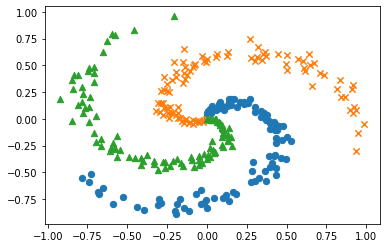

In [6]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset import spiral
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print('x', x.shape)  # (300, 2)   입력데이터 300개, 2차원 데이터
print('t', t.shape)  # (300, 3)   정답레이블  300개 3차원 데이터 (세모, 동그라미, 엑스)

# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']  # 학습에 사용할 스파이럴 데이터셋 3개의 클래스 각각을 표기
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

위 그림에서 보듯이 우리가 분류해야할 문제는 선형분류기로 풀수 없다.

### TwoLayerNet   (no batch)

np.random.randint  균일 분포의 정수 난수 1개 생성   
np.random.rand       0~1 사이의 균일분포에서 난수 배열 생성   
np.random.randn    가우시안 표준 정규 분포에서 난수 배열 생성   

In [9]:
# a = np.random.randn(4, 5)
# a

In [12]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import *


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size 
        # I : 하나의 입력값의 차원  H : 은닉층의 차원 (입력값이 은닉층을 통과하여 변환된 차원)   O : 출력차원 


        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)  # 가우시안 표준정규분포에서 난수 배열 생성, 
                                           # 가중치를 작은 무작위 값으로 설정하면 학습이 잘 될 가능성 커져서 0.01 곱함
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()   # 소프트맥스 로스층은 별도로 저장 

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []     # 순전파 방향의 레이어 순서대로 각 레이어의 params에 저장된 가중치들을 한데 모으기 위한 리스트 
        for layer in self.layers:             # 모든 가중치를 리스트에 모은다.
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):           
        for layer in self.layers:    
            x = layer.forward(x)
        return x                      # 출력층을 통과한 출력값 반환 

    def forward(self, x, t):                        # 입력값 x, 레이블 t를 받아서 
        score = self.predict(x)                     # 레이어 순서대로 순전파 시작 
        loss = self.loss_layer.forward(score, t)   # 마지막 소프트맥스로스 층에 score와 레이블 넣고 loss 계산 
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)     # 마지막 소프트맥스로스 층에 dL/dL 1 넣고 downstream gradient 계산 
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 학습 코드

In [13]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)



| epoch 1 |  iters 10 / 10 | avg_loss 1.13
| epoch 2 |  iters 10 / 10 | avg_loss 1.13
| epoch 3 |  iters 10 / 10 | avg_loss 1.12
| epoch 4 |  iters 10 / 10 | avg_loss 1.12
| epoch 5 |  iters 10 / 10 | avg_loss 1.11
| epoch 6 |  iters 10 / 10 | avg_loss 1.14
| epoch 7 |  iters 10 / 10 | avg_loss 1.16
| epoch 8 |  iters 10 / 10 | avg_loss 1.11
| epoch 9 |  iters 10 / 10 | avg_loss 1.12
| epoch 10 |  iters 10 / 10 | avg_loss 1.13
| epoch 11 |  iters 10 / 10 | avg_loss 1.12
| epoch 12 |  iters 10 / 10 | avg_loss 1.11
| epoch 13 |  iters 10 / 10 | avg_loss 1.09
| epoch 14 |  iters 10 / 10 | avg_loss 1.08
| epoch 15 |  iters 10 / 10 | avg_loss 1.04
| epoch 16 |  iters 10 / 10 | avg_loss 1.03
| epoch 17 |  iters 10 / 10 | avg_loss 0.96
| epoch 18 |  iters 10 / 10 | avg_loss 0.92
| epoch 19 |  iters 10 / 10 | avg_loss 0.92
| epoch 20 |  iters 10 / 10 | avg_loss 0.87
| epoch 21 |  iters 10 / 10 | avg_loss 0.85
| epoch 22 |  iters 10 / 10 | avg_loss 0.82
| epoch 23 |  iters 10 / 10 | avg_loss 0.

| epoch 213 |  iters 10 / 10 | avg_loss 0.15
| epoch 214 |  iters 10 / 10 | avg_loss 0.15
| epoch 215 |  iters 10 / 10 | avg_loss 0.15
| epoch 216 |  iters 10 / 10 | avg_loss 0.14
| epoch 217 |  iters 10 / 10 | avg_loss 0.14
| epoch 218 |  iters 10 / 10 | avg_loss 0.15
| epoch 219 |  iters 10 / 10 | avg_loss 0.14
| epoch 220 |  iters 10 / 10 | avg_loss 0.14
| epoch 221 |  iters 10 / 10 | avg_loss 0.14
| epoch 222 |  iters 10 / 10 | avg_loss 0.14
| epoch 223 |  iters 10 / 10 | avg_loss 0.14
| epoch 224 |  iters 10 / 10 | avg_loss 0.14
| epoch 225 |  iters 10 / 10 | avg_loss 0.14
| epoch 226 |  iters 10 / 10 | avg_loss 0.14
| epoch 227 |  iters 10 / 10 | avg_loss 0.14
| epoch 228 |  iters 10 / 10 | avg_loss 0.14
| epoch 229 |  iters 10 / 10 | avg_loss 0.13
| epoch 230 |  iters 10 / 10 | avg_loss 0.14
| epoch 231 |  iters 10 / 10 | avg_loss 0.13
| epoch 232 |  iters 10 / 10 | avg_loss 0.14
| epoch 233 |  iters 10 / 10 | avg_loss 0.13
| epoch 234 |  iters 10 / 10 | avg_loss 0.13
| epoch 23

C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phi

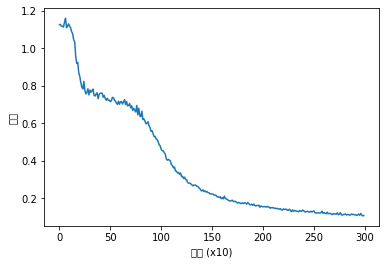

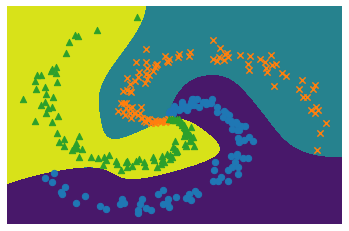

In [14]:
# 학습에 사용하는 변수
data_size = len(x)    # 300
max_iters = data_size // batch_size   # 10
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):  # max_epoch = 300
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)    #  0에서 data_size-1 까지의 무작위 순서를 생성해 반환
                                              # idx = 0부터 299까지 정수를 셔플한 배열, permutation은 배열을 복사해서 셔플한다. 
    x = x[idx]   # 넘파이 배열 인덱싱,  0부터 299까지 정수가 랜덤 순서로 뒤섞인 배열로 데이터셋 인덱싱하여 데이터셋 셔플
    t = t[idx]   # 셔플된 입력값 순서에 해당하는 레이블도 재할당  

    for iters in range(max_iters):                            # max_iters = 10,  batch_size = 30
        batch_x = x[iters*batch_size:(iters+1)*batch_size]    # 30개씩 묶는다 
        batch_t = t[iters*batch_size:(iters+1)*batch_size]    # 결국 안쪽 for문이 1에폭 도는 코드 
                                                              # 1 에폭은 학습 데이터를 모두 살펴본 시점을 뜻한다. 

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)      # 순전파 
        model.backward()                            # 역전파 
        optimizer.update(model.params, model.grads) # 가중치 업데이트 

        total_loss += loss    # 10 에폭 단위로 로스 다 더해서 
        loss_count += 1       # 10으로 나눠 10에폭 평균 로스를 구하기 위한 increment 변수 선언 

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:                 # 10에폭 때마다 평균 로스 계산 
            avg_loss = total_loss / loss_count  
            print('| epoch %d |  iters %d / %d | avg_loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)          # 평균 로스 담는 리스트 
            total_loss, loss_count = 0, 0       # 초기화 


# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

# Trainer 클래스

위에서 작성한 학습 코드를 앞으로 반복해서 쓰게 되는데 귀찮으니까 Trainer 클래스를 만들어 쓴다.   
   
   이 Trainer 클래스의 이니셜라이저는 모델과 옵티마이저를 인수로 받는다   
   
   
   
   그리고 fit메서드를 호출해 학습을 시작한다   
   fit 메서드가 받는 인자는   
   입력데이터, 정답레이블, 에폭수, 배치사이즈, eval_interval :     
   avg_loss 등 결과를 출력하기까지의 반복횟수, max_grad기울기 최대 norm(이 값을 넘어서면 기울기를 클리핑한다)    

In [ ]:
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)    # 아래 코드 있음. 5장 RNN 참고 
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()

In [15]:
def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate

In [ ]:
def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

# Trainer 클래스로 스파이더 데이터셋 재학습

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 210 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 211 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 212 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 213 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 214 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 215 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 216 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 217 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 218 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 219 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 220 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 221 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 222 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 223 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 224 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 225 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 226 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 227 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 228 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 229 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 230 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 231 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 232 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 233 |  반복 1 / 10 | 시간 0[s] | 

C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phi

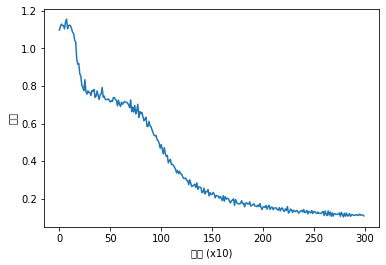

In [16]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
# from two_layer_net import TwoLayerNet


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()


# 비트 정밀도

넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용한다

In [17]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

그러나 신경망의 학습과 추론은 32비트 부동소수점 수로도 인식률을 떨어뜨리는 일이 거의 없이 수행할 수 있다고 한다   

1. 메모리 관점에선 64비트 부동소수점수보다 32비트 부동소수점수를 쓰는게 유리하다   
   
   2. 또 신경망 계산시 데이터를 전송하는 버스대역폭이 병목이 되는 경우가 있는데 이 때도 데이터 타입이 작은 게 유리하다   
      
      3. 마지막으로 계산속도도 32비트 부동소수점으로 할 때 일반적으로 더 빠르다

### 넘파이에서 32비트 부동소수점 수를 사용하는 방법

In [21]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [24]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

추론 학습시 16비트 부동소수점 수를 사용해도 좋다. (최근 GPU들은 8비트까지 지원한다)     
특히 학습된 가중치를 저장할 때는 16비트 부동소수점 수로 변환해 쓰는 게 이득이다